In [304]:
import pandas as pd
import numpy as np

In [305]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b6c80f475d884bb786f77ddb1df33813 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xUW3combhmqtPCsgr2m7-37dWKx93cVPf4gyIbrJ2u5I',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_b6c80f475d884bb786f77ddb1df33813.get_object(Bucket='salaryprediction1-donotdelete-pr-yy4gra4xjgck8y',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [306]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [307]:
# we dont have any null values

In [308]:
x=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [309]:
x=df.iloc[:,0].values.reshape(-1,1)

In [310]:
type(x)

numpy.ndarray

In [311]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [312]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [313]:
type(y)

numpy.ndarray

In [314]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [315]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [316]:
x_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [317]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [318]:
x_train.shape

(24, 1)

In [319]:
x_test.shape

(6, 1)

In [320]:
from sklearn.linear_model import LinearRegression

In [321]:
model=LinearRegression()

In [322]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [323]:
model.predict(x_test)

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [324]:
y_test

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.]])

In [325]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'salary_prediction')

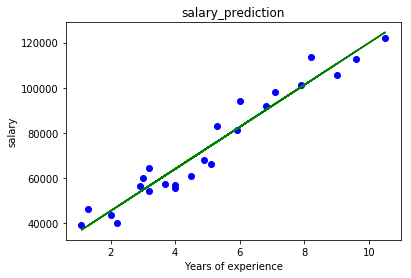

In [326]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,model.predict(x_train),color="green")
plt.xlabel("Years of experience")
plt.ylabel("salary")
plt.title("salary_prediction")

Text(0.5, 1.0, 'salary_prediction')

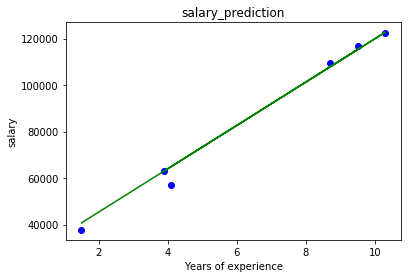

In [327]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,model.predict(x_test),color="green")
plt.xlabel("Years of experience")
plt.ylabel("salary")
plt.title("salary_prediction")

In [328]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [329]:
wml_credentials={
  "apikey": "QVO3i6iKeMXABKHIup6mQPR1ieMTPXhqLkb4Lgj52ynP",
  "iam_apikey_description": "Auto-generated for key 4a993a20-fc08-4aa2-96cd-1a60290b598f",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/f286a480c46144be853a5f3d5cf5eb8a::serviceid:ServiceId-9d41e8a9-c956-4426-88c2-20ceb7b585ed",
  "instance_id": "684a42d3-9e08-440c-bb2c-730033af34b0",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [330]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [331]:
model_props={
    client.repository.ModelMetaNames.AUTHOR_NAME : "suresh",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "b151942@rgukt.ac.in",
    client.repository.ModelMetaNames.NAME:"salary Data"
}

In [332]:
model_artifact = client.repository.store_model(model,model_props)

In [333]:
model_artifact

{'metadata': {'guid': '2d38ffab-5264-400c-8164-a534940bf05f',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/684a42d3-9e08-440c-bb2c-730033af34b0/published_models/2d38ffab-5264-400c-8164-a534940bf05f',
  'created_at': '2020-06-20T07:41:39.486Z',
  'modified_at': '2020-06-20T07:41:39.548Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/684a42d3-9e08-440c-bb2c-730033af34b0/published_models/2d38ffab-5264-400c-8164-a534940bf05f/learning_configuration',
  'author': {'name': 'suresh'},
  'name': 'salary Data',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/684a42d3-9e08-440c-bb2c-730033af34b0/published_models/2d38ffab-5264-400c-8164-a534940bf05f/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/684a42d3-9e08-440c-bb2c-730033af34b0/published_models/2d38ffab-5264-400c-8164-a534940bf05f/feedback',
  'latest_version': {'url': 'https

In [334]:
guid=client.repository.get_model_uid(model_artifact)

In [335]:
guid

'2d38ffab-5264-400c-8164-a534940bf05f'

In [336]:
deploy=client.deployments.create(guid,name="salary prediction")



#######################################################################################

Synchronous deployment creation for uid: '2d38ffab-5264-400c-8164-a534940bf05f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9a763189-fb81-493a-9991-6ff15567e91d'
------------------------------------------------------------------------------------------------




In [337]:
scoring_url=client.deployments.get_scoring_url(deploy)
scoring_url


'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/684a42d3-9e08-440c-bb2c-730033af34b0/deployments/9a763189-fb81-493a-9991-6ff15567e91d/online'